<a href="https://colab.research.google.com/github/aymanmazzouz/AI-MASI-Prediction/blob/main/masi_lstm_2010_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the csv file
import pandas as pd
data = pd.read_csv('masi.csv', delimiter=(';'))
data

,Date,Price,Open,High,Low,Vol.,Change %
0,29/12/2023,"12,092.88","12,046.61","12,136.22","12,045.95",NaN,0.38%
1,28/12/2023,"12,046.61","12,103.96","12,130.09","12,046.61",NaN,-0.47%
2,27/12/2023,"12,103.96","12,085.31","12,126.88","12,073.85",NaN,0.15%
3,26/12/2023,"12,085.31","12,147.19","12,181.26","12,085.31",NaN,-0.51%
4,25/12/2023,"12,147.19","12,182.10","12,220.48","12,147.19",NaN,-0.29%
...,...,...,...,...,...,...,...
3488,08/01/2010,"10,782.20","10,719.81","10,782.91","10,699.48",NaN,0.58%
3489,07/01/2010,"10,720.49","10,475.12","10,720.49","10,475.12",NaN,2.56%
3490,06/01/2010,"10,452.91","10,261.23","10,486.64","10,253.36",NaN,1.57%
3491,05/01/2010,"10,291.75","10,309.83","10,322.77","10,222.49",NaN,-0.20%


In [ ]:
#convert date to datetime format :
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,"12,092.88","12,046.61","12,136.22","12,045.95",NaN,0.38%
1,2023-12-28,"12,046.61","12,103.96","12,130.09","12,046.61",NaN,-0.47%
2,2023-12-27,"12,103.96","12,085.31","12,126.88","12,073.85",NaN,0.15%
3,2023-12-26,"12,085.31","12,147.19","12,181.26","12,085.31",NaN,-0.51%
4,2023-12-25,"12,147.19","12,182.10","12,220.48","12,147.19",NaN,-0.29%
...,...,...,...,...,...,...,...
3488,2010-01-08,"10,782.20","10,719.81","10,782.91","10,699.48",NaN,0.58%
3489,2010-01-07,"10,720.49","10,475.12","10,720.49","10,475.12",NaN,2.56%
3490,2010-01-06,"10,452.91","10,261.23","10,486.64","10,253.36",NaN,1.57%
3491,2010-01-05,"10,291.75","10,309.83","10,322.77","10,222.49",NaN,-0.20%


In [ ]:
#cleaning data
columns_to_convert = ['Price', 'Open', 'High', 'Low']

for col in columns_to_convert:
    if col in data.columns:
         # Check if the column's data type is a string
        if data[col].dtype == 'object':
            data[col] = data[col].str.replace(',', '').astype(float)
        else:
            print(f"Column {col} is not of string type, it's {data[col].dtype}")
    else:
        print(f"Column {col} not found in DataFrame")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,12092.88,12046.61,12136.22,12045.95,NaN,0.38%
1,2023-12-28,12046.61,12103.96,12130.09,12046.61,NaN,-0.47%
2,2023-12-27,12103.96,12085.31,12126.88,12073.85,NaN,0.15%
3,2023-12-26,12085.31,12147.19,12181.26,12085.31,NaN,-0.51%
4,2023-12-25,12147.19,12182.10,12220.48,12147.19,NaN,-0.29%
...,...,...,...,...,...,...,...
3488,2010-01-08,10782.20,10719.81,10782.91,10699.48,NaN,0.58%
3489,2010-01-07,10720.49,10475.12,10720.49,10475.12,NaN,2.56%
3490,2010-01-06,10452.91,10261.23,10486.64,10253.36,NaN,1.57%
3491,2010-01-05,10291.75,10309.83,10322.77,10222.49,NaN,-0.20%


In [ ]:
print(data.isna().sum())

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        3493
Change %       0
dtype: int64


In [ ]:
# extracting datetime features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,DayOfWeek
0,2023-12-29,12092.88,12046.61,12136.22,12045.95,NaN,0.38%,2023,12,29,4
1,2023-12-28,12046.61,12103.96,12130.09,12046.61,NaN,-0.47%,2023,12,28,3
2,2023-12-27,12103.96,12085.31,12126.88,12073.85,NaN,0.15%,2023,12,27,2
3,2023-12-26,12085.31,12147.19,12181.26,12085.31,NaN,-0.51%,2023,12,26,1
4,2023-12-25,12147.19,12182.10,12220.48,12147.19,NaN,-0.29%,2023,12,25,0


In [ ]:
df_model = data[['Date', 'Price']]
df_model

,Date,Price
0,2023-12-29,12092.88
1,2023-12-28,12046.61
2,2023-12-27,12103.96
3,2023-12-26,12085.31
4,2023-12-25,12147.19
...,...,...
3488,2010-01-08,10782.20
3489,2010-01-07,10720.49
3490,2010-01-06,10452.91
3491,2010-01-05,10291.75


Epoch 1/100
2231/2231 [==============================] - 22s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 9.9419e-04 - val_root_mean_squared_error: 0.0315
Epoch 2/100
2231/2231 [==============================] - 16s 7ms/step - loss: 7.6047e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0387
Epoch 3/100
2231/2231 [==============================] - 16s 7ms/step - loss: 5.8506e-04 - root_mean_squared_error: 0.0242 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338
Epoch 4/100
2231/2231 [==============================] - 16s 7ms/step - loss: 4.2618e-04 - root_mean_squared_error: 0.0206 - val_loss: 3.4082e-04 - val_root_mean_squared_error: 0.0185
Epoch 5/100
2231/2231 [==============================] - 16s 7ms/step - loss: 3.3070e-04 - root_mean_squared_error: 0.0182 - val_loss: 3.6282e-04 - val_root_mean_squared_error: 0.0190
Epoch 6/100
2231/2231 [==============================] - 17s 8ms/step - loss: 3.2904e-04 - r

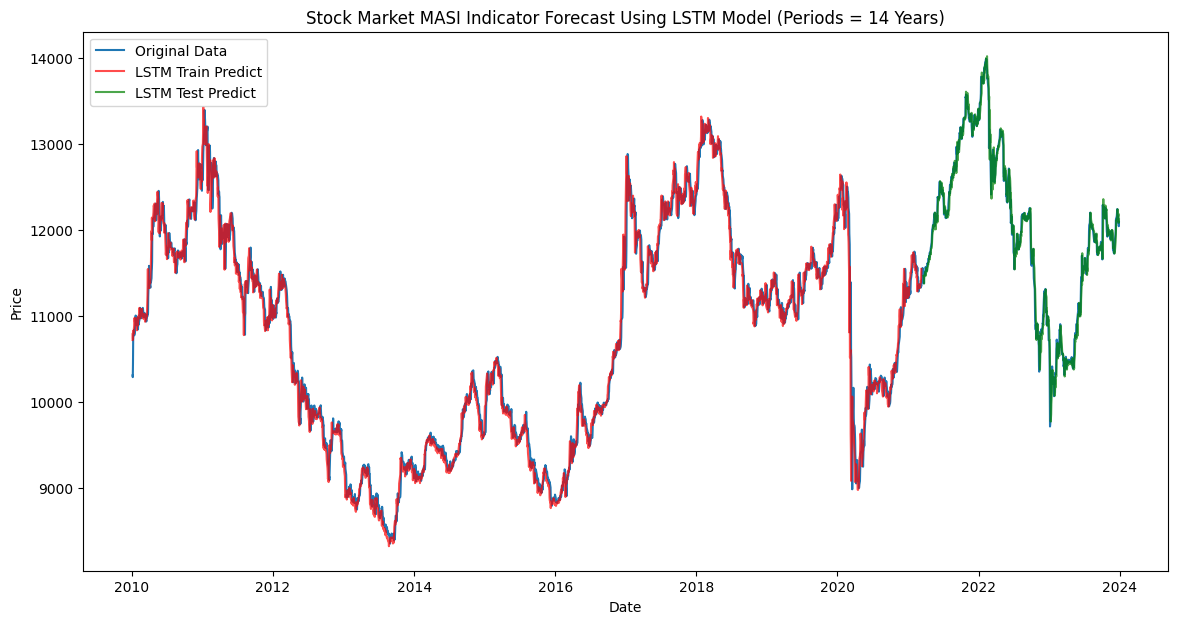

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
import pandas as pd

# Assuming df_model is prepared with 'Date' and 'Price'

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_model['Price'].values.reshape(-1,1))

# Create dataset
def create_dataset(data, time_step=1):
    dataX, dataY = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(data[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 5
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, mode='min', verbose=1, restore_best_weights=True)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.2, callbacks=[early_stopping])


# Predictions

lstm_train_predict = lstm_model.predict(X_train)
lstm_test_predict = lstm_model.predict(X_test)

# Invert predictions

lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Invert actual values for comparison
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MAE for LSTM
rmse_train_lstm = np.sqrt(mean_squared_error(y_train_actual, lstm_train_predict))
mae_train_lstm = mean_absolute_error(y_train_actual, lstm_train_predict)
rmse_test_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_test_predict))
mae_test_lstm = mean_absolute_error(y_test_actual, lstm_test_predict)

# Display the results
print(f"LSTM RMSE (Training): {rmse_train_lstm:.3f}")
print(f"LSTM MAE (Training): {mae_train_lstm:.3f}")
print(f"LSTM RMSE (Testing): {rmse_test_lstm:.3f}")
print(f"LSTM MAE (Testing): {mae_test_lstm:.3f}")



# Visualization
plt.figure(figsize=(14, 7))

df_model = df_model.sort_values('Date')
dates = pd.to_datetime(df_model['Date']).values
plt.plot(dates, df_model['Price'].values, label='Original Data')
plt.plot(dates[:len(lstm_train_predict)], lstm_train_predict, label='LSTM Train Predict', color = 'red', alpha=0.7)
plt.plot(dates[-len(lstm_test_predict):], lstm_test_predict, label='LSTM Test Predict', color = 'green', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Market MASI Indicator Forecast Using LSTM Model (Periods = 14 Years)')
plt.legend()
plt.show()